https://www.nasa.gov/feature/goddard/2020/nasa-s-james-webb-space-telescope-completes-environmental-testing

https://www.quantamagazine.org/a-victory-for-dark-matter-in-a-galaxy-without-any-20180328/

https://arxiv.org/abs/2010.02245

https://arxiv.org/abs/2010.02219

# Hypothesis Testing



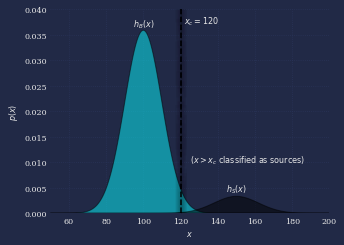

In [ ]:
"""
Example of classification
-------------------------
Figure 4.5.
An example of a simple classification problem between two Gaussian
distributions. Given a value of x, we need to assign that measurement to one
of the two distributions (background vs. source). The cut at xc = 120 leads
to very few Type II errors (i.e., false negatives: points from the distribution
hS with x < xc being classified as background), but this comes at the cost of
a significant number of Type I errors (i.e., false positives: points from the
distribution :math:`h_B` with x > xc being classified as sources).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate and draw the curves
x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

fig, ax = plt.subplots(figsize=(5, 3.75))
ax.fill(x, p1, ec='k', alpha=0.5)
ax.fill(x, p2, '-k', alpha=0.5)

ax.plot([120, 120], [0.0, 0.04], '--k')

ax.text(100, 0.036, r'$h_B(x)$', ha='center', va='bottom')
ax.text(150, 0.0035, r'$h_S(x)$', ha='center', va='bottom')
ax.text(122, 0.039, r'$x_c=120$', ha='left', va='top')
ax.text(125, 0.01, r'$(x > x_c\ {\rm classified\ as\ sources})$')

ax.set_xlim(50, 200)
ax.set_ylim(0, 0.04)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
mplcyberpunk.add_glow_effects(ax)
#mplcyberpunk.make_lines_glow(ax)
mplcyberpunk.add_underglow(ax)
plt.show()

When performing these tests, we are bound to make two types of errors, which statisticians memorably call Type I and Type II errors (Jerzy Neyman and Egon Pearson introduced this notation in 1933). **Type I errors** are cases when the null hypothesis is true but incorrectly rejected. In the context of source detection, these errors represent spurious sources, or more generally, false positives. The false-positive probability when testing a single datum is limited by the adopted significance level $\alpha$. 

Cases when the null hypothesis is false, but it is not rejected are called **Type II errors**
(missed sources, or false negatives). The false-negative probability when testing a
single datum is usually called $\beta$, and is related to the power of a test as $(1 − \beta)$.
Hypothesis testing is intimately related to comparisons of distributions, as discussed
below. The classical approach to hypothesis testing is not identical to the Bayesian
approach, and we shall return to this topic later.

## Simple Classification and Completeness vs. Contamination Trade-Off 

As the significance level $\alpha$ is decreased 
(the criterion for rejecting the null hypothesis
becomes more conservative), the number of false positives decreases and the number of false negatives increases. Therefore, there is a trade-off to be made to find an optimal value of $\alpha$, which depends on the relative importance of false negatives and positives in a particular problem. 


For example, if the null hypothesis is “my parachute is good,” we are more concerned about false negatives (it’s bad but we accept it as
good) than about false positives (it’s good but we reject it as bad) because the former
can kill us while the latter presumably has less dire consequences (what $\alpha$ would
make you feel safe in this case?).

 On the other hand, if the null hypothesis is “this undergraduate student would do great in graduate school,” then accepting a bad
student (false positive) is arguably less harmful than rejecting a truly good student
(false negative). When many instances of hypothesis testing are performed, a process called multiple hypothesis testing, the fraction of false positives can significantly exceed the
value of $\alpha$. The fraction of false positives depends not only on $\alpha$ and the number of data points, but also on the number of true positives (the latter is proportional to the
number of instances when an alternative hypothesis is true). We shall illustrate these
trade-offs with an example.


Often the underlying distribution from which data {$x_{i}$} were drawn, $h(x)$, is a
sum of two populations 
$$h(x) = (1 − a) h_{B}(x) + a h_{S}(x)$$ 
where $a$ is the relative normalization factor (we assume that integrals of $h_{B}$ and $h_{S}$ are normalized to unity). In this example there is not only a null hypothesis (B, for background), but also a specific alternative hypothesis (S, for source). 

Given {$x_{i}$}, for example counts obtained with a measuring apparatus, we want to assign to each individual measurement $x_{i}$ the probability that it belongs to population $S$, $p_{S} (x i)$ (of course, $p_{B}(x_{i}) = 1 − p_{S}(x_{i})$ as there are only these two possibilities). Recall that the size of sample {$x_{i}$} is $N$, and thus the number of true sources in the sample is $N\alpha$. A simplified version of this problem is classification, where we assign the class $S$ or $B$ without retaining the knowledge of the actual probability $p_{S}$. In order for classification based on $x$ to be possible at all, obviously $h_{B}(x)$ and $h_{S}(x)$ must be different. If we choose a classification boundary value $x_{c}$, then the expected number of spurious sources (false positives or Type I errors) in the classified sample is:

$$ n_{spurious} = N (1 − a) \alpha = N (1 − a)\int_{x_{c}}^{\infty} h_{B}(x) dx $$

and the number of missed sources (false negatives or Type II errors) is:

$$n_{missed} = N a \beta = N a \int_{0}^{x_{c}} h_{s}(x) dx $$

The number of instances classified as a source, that is, instances when the null
hypothesis is rejected, is: 

$$n_{source} = N a − n_{missed} + n_{spurious}$$

The sample **completeness (also called sensitivity and recall rate** in the statistics
literature) is defined as:

$$\eta=\frac{Na - n_{missed}}{Na}=1-\int_{0}^{x_{c}} h_{s}(x)dx$$

with $$0 ≤ \eta ≤ 1$$, and the sample contamination is defined as:

$$\epsilon=\frac{n_{spurius}}{n_{source}}$$

with $0 ≤ \epsilon ≤ 1$.  The sample contamination is also called the **false discovery rate (FDR)**. As $x_{c}$ increases, the sample contamination decreases (good), but at the same time completeness decreases too (bad). This trade-off can be analyzed using the so-called **receiver operating characteristic (ROC) curve** which typically plots the fraction of true positives vs. the fraction of true negatives.

 In astronomy, ROC curves are often plotted
as expected completeness vs. contamination rate. The position along the ROC curve is parametrized by $x_{c}$ (i.e., by the classification rule).
The **area under the ROC curve, sometimes called the c statistic**, can be used to quantify overall performance of the classification method.

To have a concrete example, we will use the source detection example and assume that $h_{B}(x) = N (\mu = 100, \sigma = 10)$ and $h_{S}(x) = N (\mu = 150, \sigma = 12)$, with $a = 0.1$ and $N = 10^{6}$ (say, an image with 1000 by 1000 resolution elements; the $x$ values correspond to the sum of background and source counts). 

If we naively choose $x_{c} = 120$ (a “$2\sigma$ cut” away from the mean for $h_{B}$ corresponding to a Type I error probability of $\alpha = 0.024$), 21,600 values will be
incorrectly classified as a source. With $x_{c} = 120$, the sample completeness is $0.9944$
and $99,400$ values are correctly classified as a source. Although the Type I error rate
is only $0.024$, the sample contamination is $21,600/(21,600 + 99,400) = 0.179$, or over
7 times higher! Of course, this result that
$\epsilon>>\alpha$ is a consequence of the fact that the true population contains 9 times as many background values as it contains sources
(a = 0.1).


In order to decrease the expected contamination level , we need to increase $x_{c}$ ,
but the optimal value depends on $a$. Since $a$ is often unknown in practice, choosing $x_{c}$ is not straightforward. A simple practical method for choosing the optimal value of $x_{c}$ for a given desired (or FDR) was proposed by Benjamini and Hochberg 1995.

---------------------------------

The Benjamini and Hochberg method assumes that measurements can be described by eq. 4.36 and makes an additional assumption that $h_{B} (x)$ is known (e.g.,  when a is small, it is possible to isolate a portion of an image to measure background count distribution). Given $h_{B} (x)$, and its cumulative counterpart $H_{B} (x)$, it is possible to assign a $p$ value to each value in {$x_{i}$} as $p_{i} = 1 − H_{B} (x_{i})$, and sort the sample so that $p_{i}$ are increasing. If all {$x_{i}$} values were drawn from $h_{B} (x)$, the differential
distribution of these $p_{i}$ values would be a uniform distribution by construction, and
its cumulative distribution, $1 ≤ C_{i} ≤ N$, would increase linearly as $$C_{i}^{B}=Np_{i}$$.

Instead, for $Na$ cases in the adopted model the null hypothesis is false and they will
result in an excess of small $p_{i}$ values; hence, the observed cumulative distribution,
$C_{i} = C ( p_{i} ) = i$ , will have values much larger than $C_{i}^{B}$ for small $p$. Benjamini and Hochberg realized that this fact can be used to find a classification threshold
$p_{c}$ (and the corresponding $x_{c}$ and its index $i_{c} = C ( p_{c} )$; recall that the sample is sorted by $p_{i}$) that guarantees that the sample contamination $\epsilon$ is below some desired value $\epsilon_{0}$. 

**Their proposal for finding $p_{c}$ is very elegant and does not require involved computations**: assume that the null hypothesis is rejected for all values $p_{i} ≤ p_{c}$ ,
resulting in a subsample of $i_{c} = C ( p_{c} )$ values (i.e., these $i_{c}$ values are selected as sources). 

The number of cases when the null hypothesis was actually true and falsely rejected is $(1 − a)N p_{c} < N p_{c}$ , and thus the contamination rate is 

$$\epsilon=\frac{(1-a)Np_{c}}{i_{c}} < \frac{Np_{c}}{i_{c}}$$

Therefore, the threshold value must satisfy:

$$i_{c}<\frac{Np_{c}}{\epsilon_{o}}$$


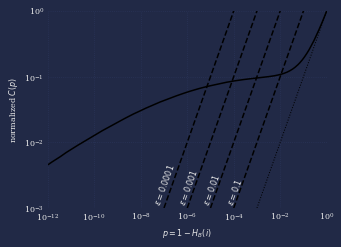

In [ ]:
r"""
Example of Benjamini & Hochberg Method
--------------------------------------
Figure 4.6.
Illustration of the Benjamini and Hochberg method for 106 points drawn from
the distribution shown in figure 4.5. The solid line shows the cumulative
distribution of observed p values, normalized by the sample size. The dashed
lines show the cutoff for various limits on contamination rate
:math:`\varepsilon` computed using eq. 4.44 (the accepted measurements are
those with p smaller than that corresponding to the intersection of solid and
dashed curves). The dotted line shows how the distribution would look in the
absence of sources. The value of the cumulative distribution at p = 0.5 is
0.55, and yields a correction factor :math:`\lambda = 1.11` (see eq. 4.46).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Set up the background and foreground distributions
background = norm(100, 10)
foreground = norm(150, 12)
f = 0.1

# Draw from the distribution
np.random.seed(42)
N = int(1E6)
X = np.random.random(N)
mask = (X < 0.1)
X[mask] = foreground.rvs(np.sum(mask))
X[~mask] = background.rvs(np.sum(~mask))

#------------------------------------------------------------
# Perform Benjamini-Hochberg method
p = 1 - background.cdf(X)
p_sorted = np.sort(p)

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(bottom=0.15)
ax = plt.axes(xscale='log', yscale='log')

# only plot every 1000th; plotting all 1E6 takes too long
ax.plot(p_sorted[::1000], np.linspace(0, 1, 1000), '-k')
ax.plot(p_sorted[::1000], p_sorted[::1000], ':k', lw=1)

# plot the cutoffs for various values of expsilon
p_reg_over_eps = 10 ** np.linspace(-3, 0, 100)
for (i, epsilon) in enumerate([0.1, 0.01, 0.001, 0.0001]):
    x = p_reg_over_eps * epsilon
    y = p_reg_over_eps
    ax.plot(x, y, '--k')

    ax.text(x[1], y[1],
            r'$\epsilon = %.1g$' % epsilon,
            ha='center', va='bottom', rotation=70)

ax.xaxis.set_major_locator(plt.LogLocator(base=100))

ax.set_xlim(1E-12, 1)
ax.set_ylim(1E-3, 1)

ax.set_xlabel('$p = 1 - H_B(i)$')
ax.set_ylabel('normalized $C(p)$')

plt.show()

The Benjamini and Hochberg algorithm is conservative because it assumes that
$(1−a) ≈ 1$ when deriving the upper bound on $\epsilon$.

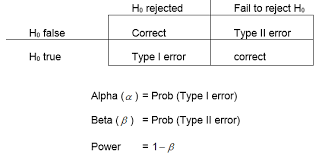

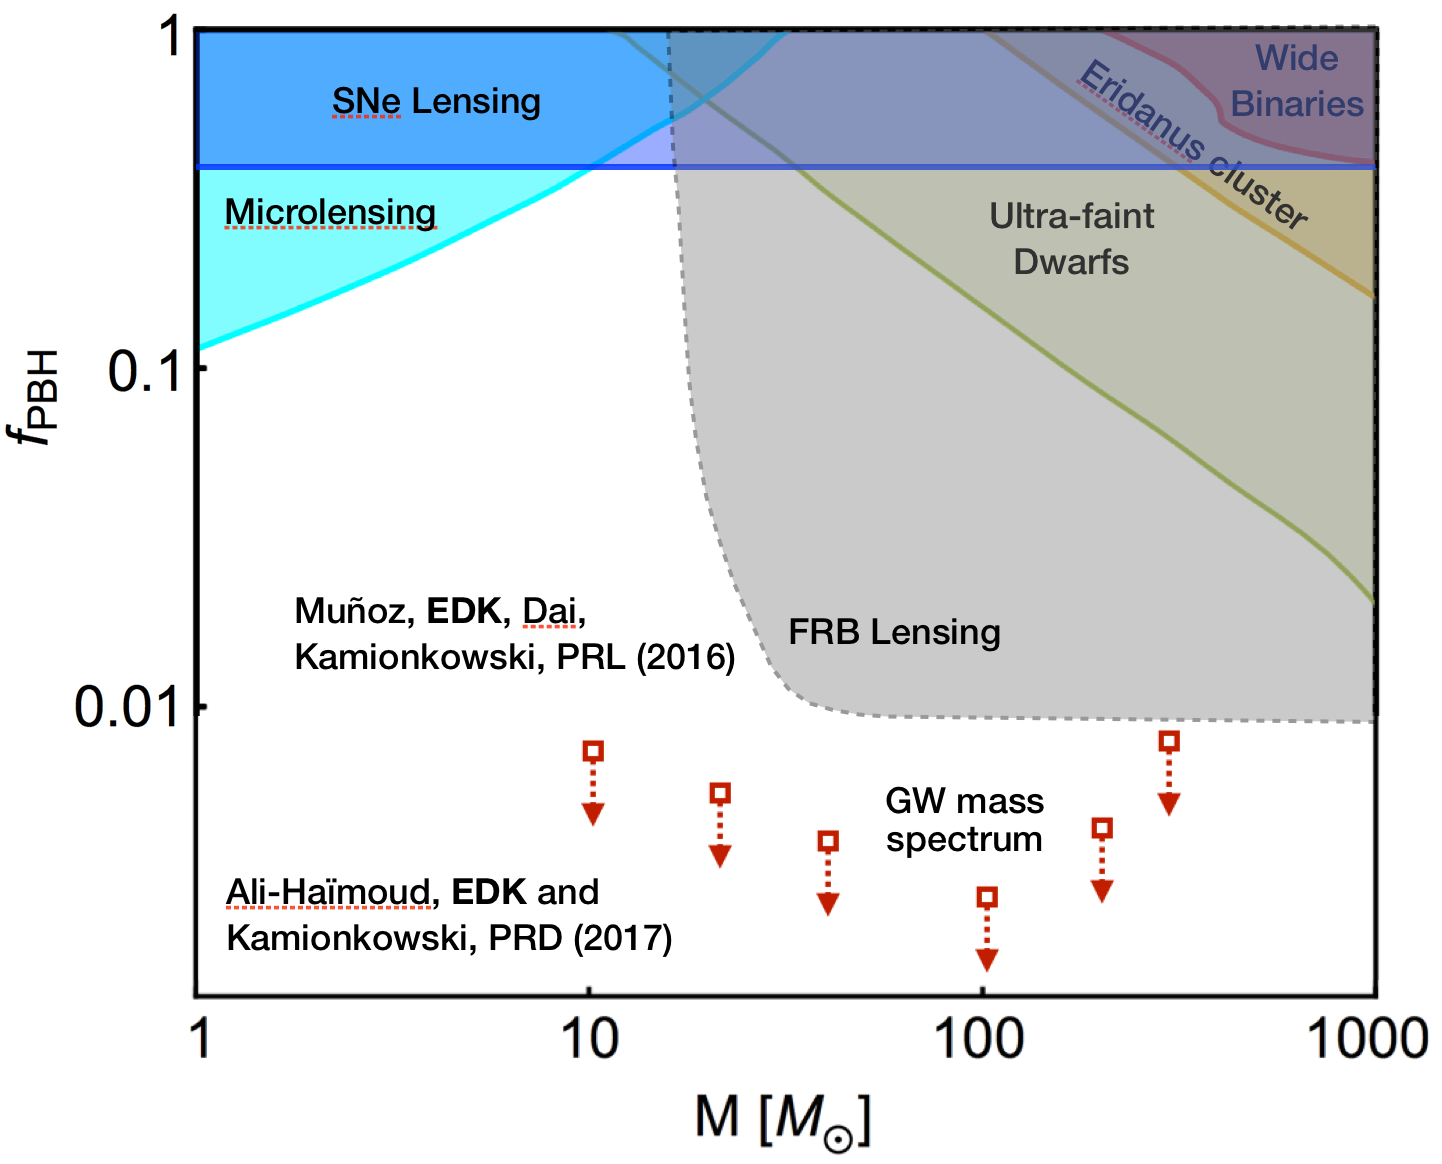

https://arxiv.org/abs/2008.10743

https://www.cambridge.org/core/journals/international-journal-of-astrobiology/article/distinguishing-multicellular-life-on-exoplanets-by-testing-earth-as-an-exoplanet/F9F31835A1E2A5EB04F3A12A09AA68E8

# Comparison of Distributions
We often ask whether two samples are drawn from the same distribution, or equivalently whether two sets of measurements imply a difference in the measured quantity. A similar question is whether a sample is consistent with being drawn from some known distribution 

In general, obtaining answers to these questions can be very complicated:

- First, what do we mean by “the same distribution”? Distributions can be described by their location, scale, and shape. When the distribution shape is assumed known,
for example when we know for one or another reason that the sample is drawn from a Gaussian distribution, the problem is greatly simplified to the consideration of only two parameters (location and scale, $\mu$ and $\sigma$ from N (μ, σ )).

- Second, we might be interested in only one of these two parameters; for example, do two sets of
measurements with different measurement errors imply the same mean value (e.g., two experimental groups measure the mass of the same elementary particle, or the same planet, using different methods).

Depending on data type (discrete vs. continuous random variables) and what we can assume (or not) about the underlying distributions, and the specific question we ask, we can use different statistical tests. The underlying idea of statistical tests is to use data to compute an appropriate statistic, and then compare the resulting data-based value to its expected distribution. The expected distribution is evaluated by assuming that the null hypothesis is true.

When this expected distribution implies that the data-based value is unlikely to have
arisen from it by chance (i.e., the corresponding $p$ value is small), the null hypothesis is rejected with some threshold probability $α$, typically 0.05 or 0.01 ( $p < \alpha$). For example, if the null hypothesis is that our datum came from the $N(0, 1)$ distribution, then $x = 3$ corresponds to $p = 
0.003$. Note again that $p > \alpha$ does not
mean that the hypothesis is proven to be correct!

## Regression toward the Mean
Before proceeding with statistical tests for comparing distributions, we point out a simple statistical selection effect that is sometimes ignored and leads to spurious conclusions.

If two instances of a data set {$x_{i}$} are drawn from some distribution, the mean difference between the matched values (i.e., the i-th value from the first set and the
i-th value from the second set) will be zero. 
However, if we use one data set to select
a subsample for comparison, the mean difference may become biased. For example, if we subselect the lowest quartile from the first data set, then the mean difference between the second and the first data set will be larger than zero.

Although this subselection step may sound like a contrived procedure, there are
documented cases where the impact of a procedure designed to improve students’
test scores was judged by applying it only to the worst performing students. Given
that there is always some randomness (measurement error) in testing scores, these
preselected students would have improved their scores without any intervention.

This effect is called “regression toward the mean”: if a random variable is extreme
on its first measurement, it will tend to be closer to the population mean on a second
measurement. In an astronomical context, a common related tale states that weather
conditions observed at a telescope site today are, typically, not as good as those
that would have been inferred from the prior measurements made during the site selection process.

Therefore, when selecting a subsample for further study, or a control sample for comparison analysis, one has to worry about various statistical selection effects.

### Nonparametric Methods for Comparing Distributions

When the distributions are not known, tests are called nonparametric, or
distribution-free tests. The most popular nonparametric test is the Kolmogorov–
Smirnov (K-S) test, which compares the cumulative distribution function, F (x),
for two samples, {$x1_{i}$}, $i = 1, . . . , N_{1}$ and {$x2_{i}$}, $i = 1, . . . , N_{2}$; we sort the sample and divide the rank of $x_{i}$ by the sample size to get $F (x_{i})$; $F(x)$ is a step function that increases by $1/N$ at each data point; note that $0 ≤ F (x) ≤ 1$.

The K-S test is based on the following statistic which measures the maximum
distance of the two cumulative distributions $F_{1} (x1)$ and $F_{2} (x2)$:

$$D=max |F_{1}(x)-F_{2}(x)|$$

$0 ≤ D ≤ 1$; we note that other statistics could be used to measure the difference
between F 1 and F 2 , e.g., the integrated square error). The key question is how often
would the value of D computed from the data arise by chance if the two samples were
drawn from the same distribution (the null hypothesis in this case). Surprisingly, this
question has a well-defined answer even when we know nothing about the underlying distribution. Kolmogorov showed in 1933 (and Smirnov published tables with the numerical results in 1948) that the probability of obtaining by chance a value of $D$ larger than the measured value is given by the function.

$$Q_{KS}(\lambda)=2\sum_{k=1}^{\infty} (-1)^{k-1}e^{-2k^2\lambda^2}$$

where the argument $\lambda$ can be accurately described by the following approximation
(as shown by Stephens in 1970; see discussion in NumRec):

$$\lambda=(0.12+\sqrt{(n_{e}}+\frac{0.11}{\sqrt{n_{e}}}))D$$

where the “effective” number of data points is computed from

$$n_{e}=\frac{N_1N_2}{N_1+N_2}$$

Note that for large $n_e$ , $\lambda ≈ \sqrt{n_{e}}D$. If the probability that a given value of D is due to
chance is very small (e.g., 0.01 or 0.05), we can reject the null hypothesis that the two
samples were drawn from the same underlying distribution.


For $n_{e}$ greater than about 10 or so, we can bypass and use the following simple approximation to evaluate $D$ corresponding to a given probability $\alpha$ of obtaining a value at least that large:

$$D_{KS}=\frac{C(\alpha)}{\sqrt{n_{e}}}$$

where $C(\alpha)$ is the critical value of the Kolmogorov distribution with $C (\alpha = 0.05) =
1.36$ and $C (\alpha = 0.01) = 1.63$. Note that the ability to reject the null hypothesis (if it
is really false) increases with $n_{e}$. For example, if $n_{e} = 100$, then $D > D_{KS} = 0.163$ would arise by chance in only 1% of all trials. If the actual data-based value is indeed
0.163, we can reject the null hypothesis that the data were drawn from the same (unknown) distribution, with our decision being correct in 99 out of 100 cases.

We can also use the K-S test to ask, “Is the measured f (x) consistent with a known reference distribution function h(x)?” (When h(x) is a Gaussian distribution with known parameters, it is more efficient to use other parametric tests described next.)  This case is called the “one-sample” K-S test, as opposed to the
“two-sample” K-S test discussed above. 

In this case, $N_{1} = N$ and $N_{2} =\infty$, and thus $n_{e}= N$. Again, a small value of $Q_{KS}$ (or $D > D_{KS}$) indicates that it is unlikely, at the given confidence level set by $\alpha$, that the data summarized by $f(x)$ were drawn from $h(x)$. **The K-S test is sensitive to the location, the scale, and the shape of the underlying distribution(s)** and, because it is based on cumulative distributions, it is invariant to reparametrization of x (we would obtain the same conclusion if, for example, we used ln(x) instead of x). The main strength but also the main weakness of the K-S test is its ignorance about the underlying distribution. For example, the test is insensitive to details in the differential distribution function (e.g., narrow regions where it drops to zero), and more sensitive near the center of the distribution than at the tails (the K-S test is not the best choice for distinguishing samples drawn from Gaussian and
exponential distributions).



In [ ]:
from scipy import stats
vals=np.random.normal(loc=0, scale=1, size=1000)
stats.kstest(vals, "norm")

KstestResult(statistic=0.0196440271926287, pvalue=0.835031681898609)

The K-S test is not the only option for nonparametric comparison of distributions. The Cramér–von Mises criterion, the Watson test, and the Anderson–Darling test, to name but a few, are similar in spirit to the K-S test, but consider somewhat different statistics. For example, the Anderson–Darling test is more sensitive to differences in the tails of the two distributions than the K-S test. A practical difficulty with these other statistics is that a simple summary of their behavior, such as given
for the K-S test, is not readily available. 

A somewhat similar quantity that is also based on the cumulative distribution function is the Gini coefficient (developed by Corrado Gini in 1912). It measures the deviation of a given cumulative distribution ($F (x)$, defined for $x_{min} ≤ x ≤ x_{max}$) from that expected for a uniform distribution:

$$G=1-2\int_{x_{min}}^{x_{max}} F(x)dx$$

When $F (x)$ corresponds to a uniform differential distribution, $G = 0$, and $G ≤ 1$
always. The Gini coefficient is not a statistical test, but we mention it here for
reference because it is commonly used in classification, in economics and related fields (usually to quantify income inequality), and sometimes confused with a statistical test.


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


______________________________________________________________________
  Kolmogorov-Smirnov test: D = 0.0076  p = 0.6
  Anderson-Darling test: A^2 = 0.29
    significance  | critical value 
    --------------|----------------
    0.58          | 15.0%
    0.66          | 10.0%
    0.79          | 5.0%
    0.92          | 2.5%
    1.09          | 1.0%
  Shapiro-Wilk test: W = 1 p = 0.59
  Z_1 = 0.2
  Z_2 = 1.0
______________________________________________________________________
  Kolmogorov-Smirnov test: D = 0.28  p = 0
  Anderson-Darling test: A^2 = 1.9e+02
    significance  | critical value 
    --------------|----------------
    0.58          | 15.0%
    0.66          | 10.0%
    0.79          | 5.0%
    0.92          | 2.5%
    1.09          | 1.0%
  Shapiro-Wilk test: W = 0.94 p = 0
  Z_1 = 32.2
  Z_2 = 2.5


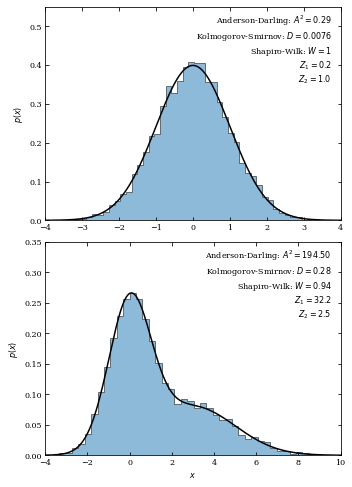

In [ ]:
"""
Gaussianity Tests
-----------------
Figure 4.7.
The results of the Anderson-Darling test, the Kolmogorov-Smirnov test, and the
Shapiro-Wilk test when applied to a sample of 10,000 values drawn from a normal
distribution (upper panel) and from a combination of two Gaussian distributions
(lower panel).
The functions are available in the ``scipy`` package:
- The Anderson-Darling test (``scipy.stats.anderson``)
- The Kolmogorov-Smirnov test (``scipy.stats.kstest``)
- The Shapiro-Wilk test (``scipy.stats.shapiro``)
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function, division

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

from astroML.stats import mean_sigma, median_sigmaG

# create some distributions
np.random.seed(1)
normal_vals = stats.norm(loc=0, scale=1).rvs(10000)
dual_vals = stats.norm(0, 1).rvs(10000)
dual_vals[:4000] = stats.norm(loc=3, scale=2).rvs(4000)

x = np.linspace(-4, 10, 1000)
normal_pdf = stats.norm(0, 1).pdf(x)
dual_pdf = 0.6 * stats.norm(0, 1).pdf(x) + 0.4 * stats.norm(3, 2).pdf(x)

vals = [normal_vals, dual_vals]
pdf = [normal_pdf, dual_pdf]
xlims = [(-4, 4), (-4, 10)]


#------------------------------------------------------------
# Compute the statistics and plot the results
fig = plt.figure(figsize=(5, 7))
fig.subplots_adjust(left=0.13, right=0.95,
                    bottom=0.06, top=0.95,
                    hspace=0.1)

for i in range(2):
    ax = fig.add_subplot(2, 1, 1 + i)  # 2 x 1 subplot

    # compute some statistics
    A2, sig, crit = stats.anderson(vals[i])
    D, pD = stats.kstest(vals[i], "norm")
    W, pW = stats.shapiro(vals[i])

    mu, sigma = mean_sigma(vals[i], ddof=1)
    median, sigmaG = median_sigmaG(vals[i])

    N = len(vals[i])
    Z1 = 1.3 * abs(mu - median) / sigma * np.sqrt(N)
    Z2 = 1.1 * abs(sigma / sigmaG - 1) * np.sqrt(N)

    print(70 * '_')
    print("  Kolmogorov-Smirnov test: D = %.2g  p = %.2g" % (D, pD))
    print("  Anderson-Darling test: A^2 = %.2g" % A2)
    print("    significance  | critical value ")
    print("    --------------|----------------")
    for j in range(len(sig)):
        print("    {0:.2f}          | {1:.1f}%".format(sig[j], crit[j]))
    print("  Shapiro-Wilk test: W = %.2g p = %.2g" % (W, pW))
    print("  Z_1 = %.1f" % Z1)
    print("  Z_2 = %.1f" % Z2)

    # plot a histogram
    ax.hist(vals[i], bins=50, density=True, histtype='stepfilled', alpha=0.5)
    ax.plot(x, pdf[i], '-k')
    ax.set_xlim(xlims[i])

    # print information on the plot
    info = "Anderson-Darling: $A^2 = %.2f$\n" % A2
    info += "Kolmogorov-Smirnov: $D = %.2g$\n" % D
    info += "Shapiro-Wilk: $W = %.2g$\n" % W
    info += "$Z_1 = %.1f$\n$Z_2 = %.1f$" % (Z1, Z2)
    ax.text(0.97, 0.97, info,
            ha='right', va='top', transform=ax.transAxes)

    if i == 0:
        ax.set_ylim(0, 0.55)
    else:
        ax.set_ylim(0, 0.35)
        ax.set_xlabel('$x$')

    ax.set_ylabel('$p(x)$')

plt.show()


In [ ]:
?stats.anderson

https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers#python_ci_mean

An Introduction to Statistics
Author: Thomas Haslwanter

In [ ]:
!pip install astroML

     |████████████████████████████████| 112kB 3.5MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=efbf0518eec03ca83a8c707d7895a1a9302a24fb4f6fd078ec82607a73c8a851
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [ ]:
!pip install mplcyberpunk